In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("Food_Production.csv")
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [45]:
df.shape

(43, 23)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [47]:
df['Food product'].unique()

array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [48]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

### Data cleaning

To fill in some of the missing values for the columns, I found the values for some food products on this website [https://ourworldindata.org/grapher/ghg-kcal-poore?tab=table&tableSearch=praw] and for the values I did not find, I replaced the missing values with 0


In [57]:
# Identify missing values in "Eutrophying emissions per kilogram"
missing_products = df.loc[
    df["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"].isna(),
    "Food product"
].unique()

print("Food products with missing Eutrophying emissions per kilogram:")
for product in missing_products:
    print("-", product)

Food products with missing Eutrophying emissions per kilogram:
- Wheat & Rye (Bread)
- Maize (Meal)
- Barley (Beer)
- Tofu
- Shrimps (farmed)


In [61]:
# Dictionary of food products and their eutrophying emissions values
new_values = {
    "Wheat & Rye (Bread)": 7.16,
    "Maize (Meal)": 4.03,
    "Barley (Beer)": 2.33,
    "Tofu": 6.16,
    "Shrimps (farmed)": 227.22
}

# Loop through dictionary and update values only if missing
for food, value in new_values.items():
    df.loc[
        (df["Food product"] == food) & 
        (df["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"].isna()),
        "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"
    ] = value

# # Verify the updates
# print(df[df["Food product"].isin(new_values.keys())][
#     ["Food product", "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]
# ])


In [65]:
# Dictionary of food products and their eutrophying emissions per 100g of protein values
new_values = {
    "Wheat & Rye (Bread)": 5.9,
    "Maize (Meal)": 4.2,
    "Tofu": 3.9,
    "Shrimps (farmed)": 153.8
}

# Loop through dictionary and update values only if missing
for food, value in new_values.items():
    df.loc[
        (df["Food product"] == food) & 
        (df["Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)"].isna()),
        "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)"
    ] = value

In [ ]:
# fill the rest of then NAN values with 0
df["Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)"].fillna(0, inplace=True)

In [66]:
# Dictionary of food products and their eutrophying emissions per 1000kcal of protein values
new_values = {
    "Wheat & Rye (Bread)": 2.7,
    "Maize (Meal)": 0.9,
    "Barley (Beer)": 0.5,
    "Tofu": 2.3,
    "Shrimps (farmed)": 220.6
}

# Loop through dictionary and update values only if missing
for food, value in new_values.items():
    df.loc[
        (df["Food product"] == food) & 
        (df["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"].isna()),
        "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"
    ] = value

In [ ]:
# fill the rest of then NAN values with 0
df["Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)"].fillna(0, inplace=True)

In [71]:
# Dictionary of food products and their Greenhouse gas emissions per 100g of protein values
new_values = {
    "Wheat & Rye (Bread)": 1.29,
    "Maize (Meal)": 1.79,
    "Tofu": 1.98,
    "Shrimps (farmed)": 18.19
}

# Loop through dictionary and update values only if missing
for food, value in new_values.items():
    df.loc[
        (df["Food product"] == food) & 
        (df["Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"].isna()),
        "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"
    ] = value

In [72]:
# fill the rest of then NAN values with 0
df["Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"].fillna(0, inplace=True)

In [75]:
# Dictionary of food products and their Greenhouse gas emissions per 100g of protein values
new_values = {
    "Wheat & Rye (Bread)": 0.59,
    "Maize (Meal)": 0.38,
    "Barley (Beer)": 0.24,
    "Tofu": 1.17,
    "Shrimps (farmed)": 26.09
}

# Loop through dictionary and update values only if missing
for food, value in new_values.items():
    df.loc[
        (df["Food product"] == food) & 
        (df["Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"].isna()),
        "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)"
    ] = value

In [77]:
df["Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"].fillna(0, inplace=True)

### Business Questions

Q1. Which food products contribute the most to total greenhouse gas emissions?

Hypothesis: Animal-based foods (especially red meats like beef and lamb) will dominate the top contributors to emissions, while plant-based staples (grains, legumes) will rank among the lowest.

Q2. How do animal-based vs. plant-based foods differ in carbon, water, and land use impacts?

Hypothesis: Animal-based foods will show significantly higher GHG emissions, water use, and land use compared to plant-based foods, even when adjusted per kilogram or per protein.

Q3. What food products require the highest water withdrawals per kilogram?

Hypothesis: Rice, nuts (like almonds), and some fruits will have extremely high freshwater withdrawals compared to cereals and pulses. Beef and dairy will also rank high due to water-intensive feed.

Q4. Which foods have the largest land footprint per kg and per 100g protein?

Hypothesis: Beef, lamb, and dairy products will require the largest land use per kg and per protein, while lentils and peas will have a much smaller footprint.

Q5. How does processing & transportation compare to farming in contributing to emissions?

Hypothesis: Farming will account for the majority of emissions, while processing and transport will contribute relatively little (<15% of total emissions) for most products.

Q6. Are there foods that provide high protein with relatively low environmental cost?

Hypothesis: Legumes (lentils, peas, beans) and some cereals will deliver high protein with lower emissions, land, and water footprints compared to animal protein.

Q7. What are the top 10 most sustainable foods (lowest emissions + water + land use combined)?

Hypothesis: Plant-based staples (potatoes, oats, peas, lentils, maize) will appear in the top 10, while animal-based foods will dominate the bottom sustainability rankings.

Q8. Between these 4 commonly grown crops in Ghana, rice, cassave, groundnut and maize, which crop has higher eutrophying emissions per kilogram and what does this mean for farmers aiming to minimize nutrient pollution?

### categorizing food into plant_based and animal_based

In [49]:
df["Category"] = df["Animal Feed"].apply(lambda x: "Plant-based" if x == 0 else "Animal-based")

In [50]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant-based
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant-based
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Plant-based
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461,Plant-based
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480,Plant-based


### Q1. Which food products contribute the most to total greenhouse gas emissions?

In [51]:
top10_emissions = df.nlargest(10, "Total_emissions")[["Food product", "Total_emissions", "Category"]]
top10_emissions

,Food product,Total_emissions,Category
33,Beef (beef herd),59.6,Animal-based
35,Lamb & Mutton,24.5,Animal-based
39,Cheese,21.2,Animal-based
34,Beef (dairy herd),21.1,Animal-based
32,Dark Chocolate,18.7,Plant-based
31,Coffee,16.5,Plant-based
42,Shrimps (farmed),11.8,Animal-based
16,Palm Oil,7.6,Plant-based
36,Pig Meat,7.2,Animal-based
37,Poultry Meat,6.1,Animal-based


### Visualize the top 10 emission contributors

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


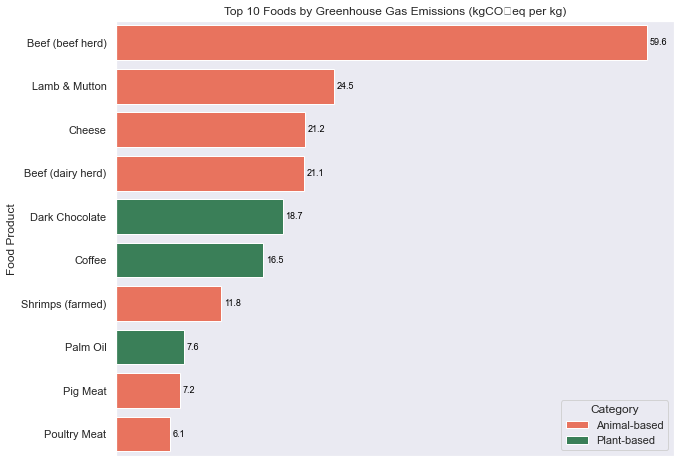

In [52]:
# Set theme
sns.set_theme(style="darkgrid")

# Custom color palette (Animal = red, Plant = green)
palette = {"Animal-based": "tomato", "Plant-based": "seagreen"}

# Plot
plt.figure(figsize=(10,8))
ax = sns.barplot(
    data=top10_emissions.sort_values("Total_emissions", ascending=False),  # sort highest first
    x="Total_emissions", 
    y="Food product",
    hue="Category",
    dodge=False,
    palette=palette
)

# Add manual data labels
for i, (value, category) in enumerate(zip(top10_emissions.sort_values("Total_emissions", ascending=False)["Total_emissions"],
                                          top10_emissions.sort_values("Total_emissions", ascending=False)["Category"])):
    ax.text(value + 0.3, i, f"{value:.1f}", va="center", ha="left", fontsize=9, color="black")

# Title
plt.title("Top 10 Foods by Greenhouse Gas Emissions (kgCO₂eq per kg)")

# Remove x-axis label and ticks
plt.xlabel("")
plt.xticks([])

# Y-label
plt.ylabel("Food Product")

# Legend
plt.legend(title="Category")

plt.show()

Animal-based foods (especially red meats like beef and lamb) dominates the top contributors to emissions, while plant-based staples such as Dar Chocolate, Coffee and Palm Oil, not so much

### Q5. How does processing & transportation compare to farming in contributing to emissions?

In [53]:
# Select only emission breakdown columns
emission_breakdown = df[[
    "Food product", "Category", 
    "Farm",
    "Processing",
    "Transport",
    "Total_emissions"
]]

# Compute average emissions share by category
emission_share = emission_breakdown.groupby("Category").mean()

# Normalize to percentages of total
for col in ["Farm", 
            "Processing", 
            "Transport"]:
    emission_share[col] = (emission_share[col] / emission_share["Total_emissions"]) * 100

emission_share = emission_share[[
    "Farm",
    "Processing",
    "Transport"
]]

emission_share

,Farm,Processing,Transport
Category,,,
Animal-based,64.002441,3.050641,1.464308
Plant-based,47.685684,6.350915,6.458558


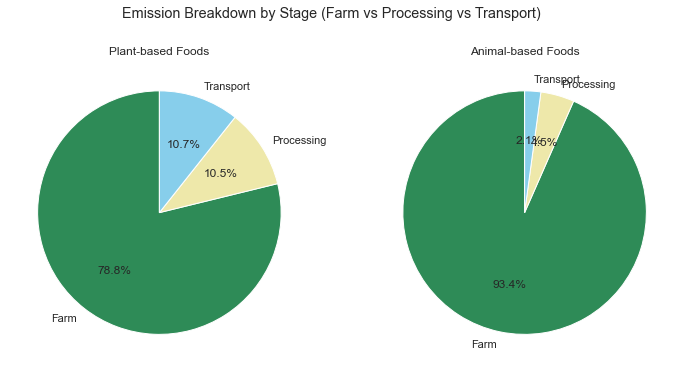

In [54]:
# Prepare data
emission_share.reset_index(inplace=True)

# Separate animal-based and plant-based shares
animal_data = emission_share[emission_share["Category"] == "Animal-based"].iloc[0]
plant_data = emission_share[emission_share["Category"] == "Plant-based"].iloc[0]

# Labels and colors
labels = ["Farm", "Processing", "Transport"]
colors = ["seagreen", "palegoldenrod", "skyblue"]

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plant-based pie
axes[0].pie(
    [plant_data[l] for l in labels], labels=labels, autopct="%.1f%%",
    startangle=90, colors=colors
)
axes[0].set_title("Plant-based Foods")

# Animal-based pie
axes[1].pie(
    [animal_data[l] for l in labels], labels=labels, autopct="%.1f%%",
    startangle=90, colors=colors
)
axes[1].set_title("Animal-based Foods")

plt.suptitle("Emission Breakdown by Stage (Farm vs Processing vs Transport)")
plt.show()

Farming accounts for the majority of emissions, while processing and transport will contribute relatively little (<15% of total emissions) for both Plant-based and Animal-based foods.

### Q3. What food products require the highest water withdrawals per kilogram?

Water withdrawals, or water abstractions, is freshwater taken from ground or surface water sources, either permanently or temporarily, and conveyed to a place of use.

What is the effct of water withdrawal on the environment? The withdrawal of water is done mainly by sectors such as agriculture, industries, domestic sectors, and so on. An increase in the population and the activities associated with that increase lead to a rise in the consumption of water in day-to-day life, which is one of the largest problems and enables the implementation of water conservation in the world. 

In [55]:
# Select relevant columns
water_use = df[["Food product", "Category", "Freshwater withdrawals per kilogram (liters per kilogram)"]]

# Drop missing values
water_use = water_use.dropna()

# Sort by highest water use
top10_water = water_use.sort_values(
    by="Freshwater withdrawals per kilogram (liters per kilogram)", 
    ascending=False
).head(10)

top10_water

,Food product,Category,Freshwater withdrawals per kilogram (liters per kilogram)
39,Cheese,Animal-based,5605.2
11,Nuts,Plant-based,4133.8
41,Fish (farmed),Animal-based,3691.3
34,Beef (dairy herd),Animal-based,2714.3
4,Rice,Plant-based,2248.4
19,Olive Oil,Plant-based,2141.8
12,Groundnuts,Plant-based,1852.3
35,Lamb & Mutton,Animal-based,1802.8
36,Pig Meat,Animal-based,1795.8
33,Beef (beef herd),Animal-based,1451.2


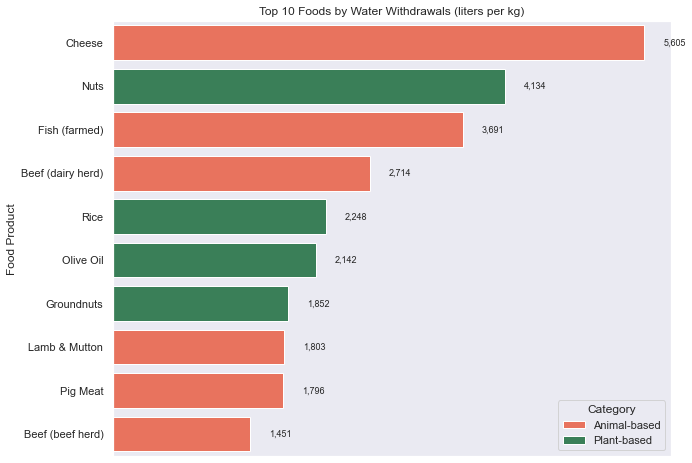

In [56]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,8))
ax = sns.barplot(
    data=top10_water,
    x="Freshwater withdrawals per kilogram (liters per kilogram)",
    y="Food product",
    hue="Category",
    dodge=False,
    palette={"Animal-based": "tomato", "Plant-based": "seagreen"}
)

# Add labels
for i, v in enumerate(top10_water["Freshwater withdrawals per kilogram (liters per kilogram)"]):
    ax.text(v + 200, i, f"{v:,.0f}", va="center", fontsize=9)

# Title
plt.title("Top 10 Foods by Water Withdrawals (liters per kg)")

# Remove x-axis label and ticks
ax.set_xlabel("")  
ax.set_xticks([])  

plt.ylabel("Food Product")
plt.legend(title="Category")
plt.show()

### Q8. Between these 4 commonly grown crops in Ghana, rice, cassave, groundnut and maize, which crop has higher eutrophying emissions per kilogram and what does this mean for farmers aiming to minimize nutrient pollution?

In [1]:
# external_eutrophying_kg = pd.read_csv('ourworldindata_Eutrophyingemissionperkg.csv')
# external_eutrophying_kg.head()

In [2]:
# #drop two columns
# external_eutrophying_kg = external_eutrophying_kg.drop(columns=["Code", "Year"])

In [3]:
# rename columns
# external_eutrophying_kg = external_eutrophying_kg.rename(columns={
#     "Entity": "Food product",
#     "Eutrophying emissions per kilogram (Poore & Nemecek, 2018)": 
#     "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"
# })

In [62]:
# Select relevant columns
eutrophying = df[["Food product", "Category", "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]]

# Filter for the 4 crops of interest
ghana_crops = eutrophying[
    eutrophying["Food product"].isin(["Rice", "Maize (Meal)", "Cassava", "Groundnuts"])
]

# print("Eutrophying emissions per kilogram (gPO₄eq per kg) for Ghana crops:")

In [63]:
# Sort crops by eutrophying emissions (ascending order)
ghana_crops_sorted = ghana_crops.sort_values(
    by="Eutrophying emissions per kilogram (gPO₄eq per kilogram)",
    ascending=False
)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8324 missing from current font.
  font.set_text(s, 0, flags=flags)


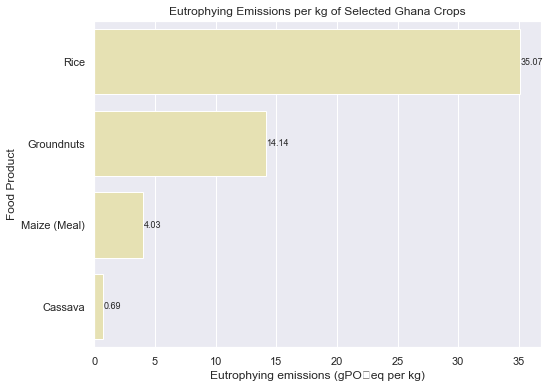

In [64]:

sns.set_theme(style="darkgrid")

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=ghana_crops_sorted,
    x="Eutrophying emissions per kilogram (gPO₄eq per kilogram)",
    y="Food product",
    hue="Category",
    dodge=False,
    palette={"Plant-based": "palegoldenrod"}
)

# Add data labels
for i, v in enumerate(ghana_crops_sorted["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]):
    ax.text(v + 0.05, i, f"{v:.2f}", va="center", fontsize=9)

plt.title("Eutrophying Emissions per kg of Selected Ghana Crops")
plt.xlabel("Eutrophying emissions (gPO₄eq per kg)")
plt.ylabel("Food Product")
plt.legend([],[], frameon=False)  # remove legend since all are plant-based
plt.show()

In [67]:
# Select relevant columns
eutrophying_cal_pro = df[["Food product", "Category", "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)", "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)"]]

# Filter for the 4 crops of interest
ghana_crops_cal_pro = eutrophying_cal_pro[
    eutrophying_cal_pro["Food product"].isin(["Rice", "Maize (Meal)", "Cassava", "Groundnuts"])
]
# ghana_crops_cal_pro

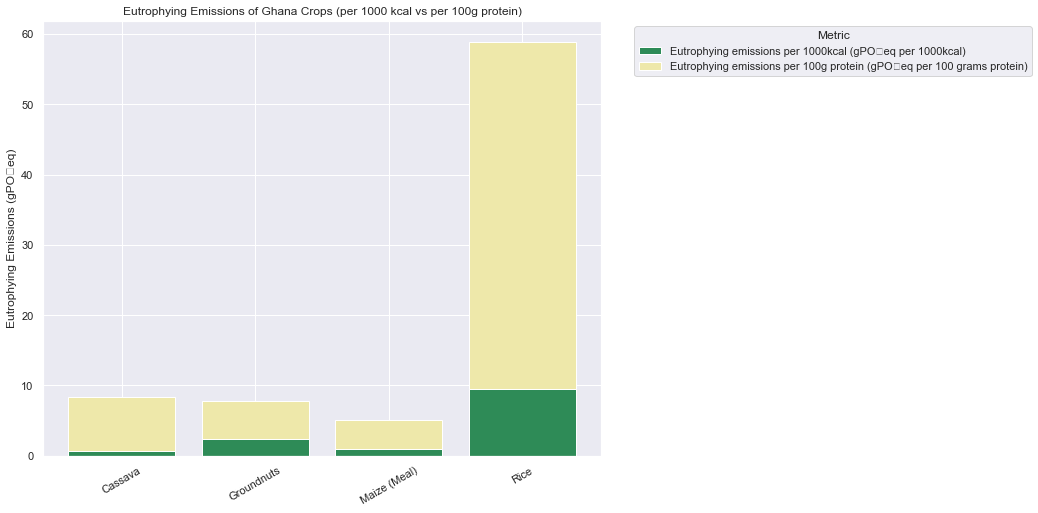

In [68]:
# Melt the data for easier plotting
ghana_crops_melted = ghana_crops_cal_pro.melt(
    id_vars=["Food product", "Category"],
    value_vars=[
        "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)", 
        "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)"
    ],
    var_name="Metric",
    value_name="Eutrophying Emissions"
)

# Pivot to wide format for stacking
pivot_data = ghana_crops_melted.pivot(
    index="Food product", columns="Metric", values="Eutrophying Emissions"
).fillna(0)

# --- Plot ---
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,8))

# Stacked bar plot
bottom = None
colors = ["seagreen", "palegoldenrod"]

for idx, metric in enumerate(pivot_data.columns):
    ax.bar(
        pivot_data.index, 
        pivot_data[metric], 
        bottom=bottom, 
        label=metric, 
        color=colors[idx]
    )
    bottom = pivot_data[metric] if bottom is None else bottom + pivot_data[metric]

# Labels and title
ax.set_ylabel("Eutrophying Emissions (gPO₄eq)")
ax.set_title("Eutrophying Emissions of Ghana Crops (per 1000 kcal vs per 100g protein)")
ax.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=30)

plt.show()

### Greenhouse Emissions per kg, per 1000kcal and 100g protein

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)


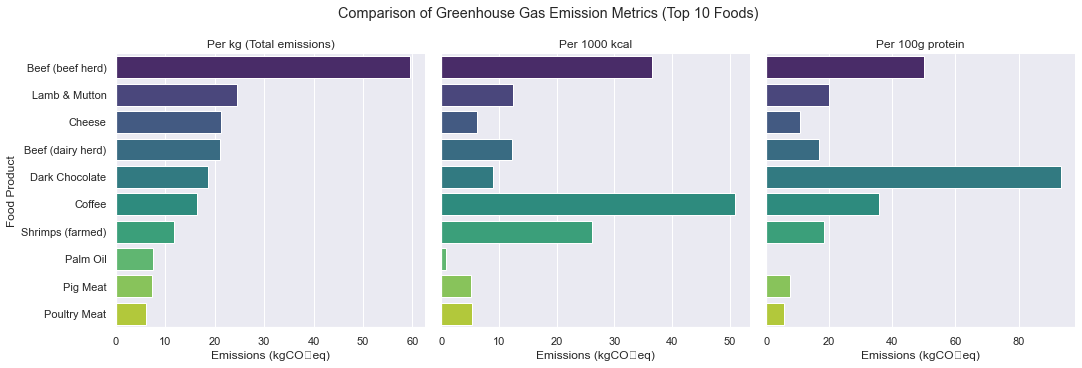

In [79]:
# Step 1: Select relevant columns
ghg_compare = df[[
    "Food product", 
    "Total_emissions", 
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)"
]]

# Step 2: Find top 10 emitters by Total_emissions
top10_emitters = ghg_compare.nlargest(10, "Total_emissions")

# Step 3: Melt into long format for plotting
ghg_melted = top10_emitters.melt(
    id_vars="Food product", 
    var_name="Metric", 
    value_name="Emissions"
)

# Step 4: Rename metrics for readability
ghg_melted["Metric"] = ghg_melted["Metric"].replace({
    "Total_emissions": "Per kg (Total emissions)",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "Per 1000 kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "Per 100g protein"
})

# Step 5: Faceted barplots
g = sns.FacetGrid(
    ghg_melted, 
    col="Metric", 
    sharex=False, sharey=True, 
    height=5, aspect=1
)

g.map_dataframe(
    sns.barplot, 
    x="Emissions", y="Food product", 
    palette="viridis"
)

g.set_axis_labels("Emissions (kgCO₂eq)", "Food Product")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Comparison of Greenhouse Gas Emission Metrics (Top 10 Foods)")

plt.show()